In [17]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import text

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
df = pd.read_sql("SELECT * FROM MEASUREMENT",engine)

df["date"] = pd.to_datetime(df["date"])

df.sort_values(by="prcp", ascending=False).head()

,id,station,date,prcp,tobs
6700,6701,USC00514830,2014-07-20,11.53,76.0
14578,14579,USC00519281,2016-07-25,9.64,78.0
12563,12564,USC00519281,2011-01-13,8.81,68.0
18269,18270,USC00516128,2013-11-10,8.06,70.0
13843,13844,USC00519281,2014-07-20,7.97,73.0


Text(0.5,0,'Date')

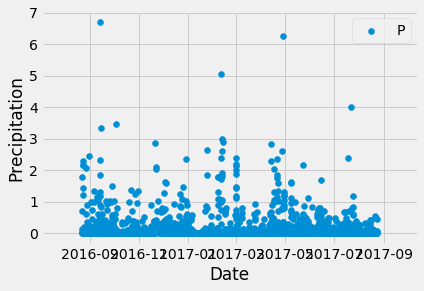

In [18]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
prcp_last_year = text("""SELECT * FROM MEASUREMENT \
                         WHERE DATE BETWEEN '2016-08-23' and '2017-08-23'""")

prcp_last_year_df = pd.read_sql(prcp_last_year, engine)

prcp_last_year_df["date"] = pd.to_datetime(prcp_last_year_df["date"])

prcp_last_year_df = prcp_last_year_df.set_index("date")

# plt.bar(np.arange(0,len(prcp_last_year_df),1), prcp_last_year_df["prcp"])
plt.scatter(prcp_last_year_df.index,prcp_last_year_df["prcp"])
plt.legend("Precipitation")
plt.ylabel("Precipitation")
plt.xlabel("Date")

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_last_year_df["prcp"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [13]:
# Design a query to show how many stations are available in this dataset?
stations = text("""SELECT COUNT (DISTINCT STATION) FROM STATION""")
pd.read_sql(stations, engine)

,COUNT (DISTINCT STATION)
0,9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = text("""SELECT * FROM MEASUREMENT""")
pd.read_sql(active, engine).groupby("station")["id"].count().sort_values(ascending=False)

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: id, dtype: int64

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = text("""SELECT STATION, TOBS FROM MEASUREMENT \
               WHERE STATION = 'USC00519281'""")

temp_df = pd.read_sql(temp, engine)

max_temp = temp_df["tobs"].max()

min_temp = temp_df["tobs"].min()

mean_temp = temp_df["tobs"].mean()

pd.Series({"Station" : "USC00519281",
           "Max Temp": max_temp,
           "Min Temp": min_temp,
           "Mean Temp": mean_temp,      
          })

Station      USC00519281
Max Temp              85
Min Temp              54
Mean Temp        71.6638
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1D02D0FD0>]],
      dtype=object)

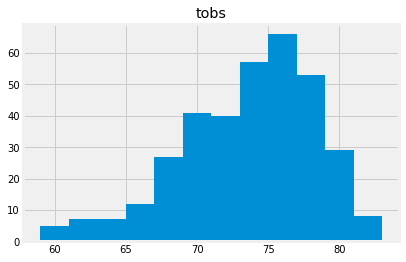

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist = text("""SELECT STATION, TOBS FROM MEASUREMENT \
               WHERE STATION = 'USC00519281' AND \
               DATE BETWEEN '2016-08-23' and '2017-08-23'""")

pd.read_sql(hist, engine).hist(bins=12)